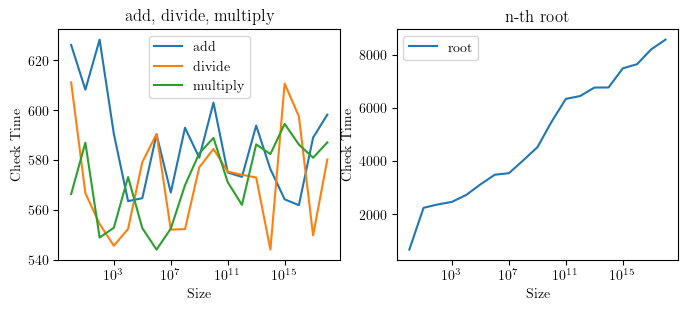

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

plt.rcParams['text.usetex'] = True
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['pgf.texsystem'] = 'lualatex'

files = [
    "add.bench.ts.json",
    "divide.bench.ts.json",
    "multiply.bench.ts.json",
    "root.bench.ts.json",
]

columnsMap = {
    "instantiationCount": "Instantiation Count",
    "symbolCount": "Symbol Count",
    "checkTime": "Check Time",
}

def plot(column: str):
    # .rename(columns=lambda x: columnsMap[x] if x in columnsMap else x)
    dfs = [pd.read_json(i).transpose() for i in files]
    concats = []
    for i in np.arange(len(files)):
        df = dfs[i]
        name = files[i].split(".")[0]

        lst = np.array([re.findall("([0-9]+)", i) for i in df.index])
        newlst = lst.copy()
        for i in np.arange(0, lst.shape[1]):
            if len(set(lst[:, i])) == 1:
                newlst = np.delete(newlst, i, axis=1)

        df.index = newlst[:, 0].astype(np.uint64)
        concats.append(df.applymap(lambda x: x["mean"])[column].rename(name))

    df = pd.concat(concats, axis=1)
    # create the first plot with 3 columns
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))
    df.plot(y=['add', 'divide', 'multiply'], ax=ax1, logx=True)

    # create the second plot with the 4th column
    df.plot(y='root', ax=ax2, logx=True)

    # set titles for the plots
    ax1.set_title('add, divide, multiply')
    ax2.set_title('n-th root')

    # set labels for the x-axis and y-axis
    ax1.set_xlabel('Size')
    ax2.set_xlabel('Size')
    ax1.set_ylabel(columnsMap[column])
    ax2.set_ylabel(columnsMap[column])

plot("checkTime")
plt.savefig('check-time.pgf', bbox_inches='tight')



In [10]:
latex = df.applymap(
    lambda x: "{:0.4f} \pm {:0.4f}".format(x["mean"], x["variance"])
    if x["variance"] > 0
    else str(x["mean"])
).drop("Symbol Count", axis=1)

latex.index = latex.index.map(lambda x: f"\code{{{x}}}")
print(
    latex.to_latex(escape=False, formatters={
        "Check Time": lambda x: f"${x}$",
    }, float_format="%.2f")
)

\begin{tabular}{lll}
\toprule
{} & Instantiation Count &                   Check Time \\
\midrule
\code{Root<"1", "2">}                   &              101781 &     $657.9258 \pm 4637.2670$ \\
\code{Root<"10", "2">}                  &              943579 &   $2231.2624 \pm 26354.7449$ \\
\code{Root<"100", "2">}                 &              995709 &   $2358.4428 \pm 46642.8882$ \\
\code{Root<"1000", "2">}                &             1150338 &    $2457.2318 \pm 7974.3022$ \\
\code{Root<"10000", "2">}               &             1290084 &   $2717.1363 \pm 22569.9561$ \\
\code{Root<"100000", "2">}              &             1390432 &   $3114.9099 \pm 89929.3402$ \\
\code{Root<"1000000", "2">}             &             1480678 &  $3476.8778 \pm 132963.1171$ \\
\code{Root<"10000000", "2">}            &             1715701 &  $3535.6702 \pm 217462.3269$ \\
\code{Root<"100000000", "2">}           &             1944285 &   $4017.5913 \pm 22143.6082$ \\
\code{Root<"1000000000", "2">}        

/var/folders/l5/qn98b8m12cd_0zlmxh0p_pvm0000gn/T/ipykernel_79837/1545966327.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex.to_latex(escape=False, formatters={


<Axes: >

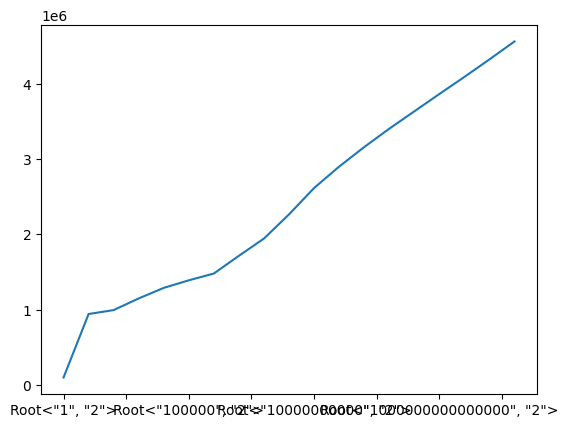

In [11]:
df.applymap(lambda x: x["mean"])["Instantiation Count"].plot()

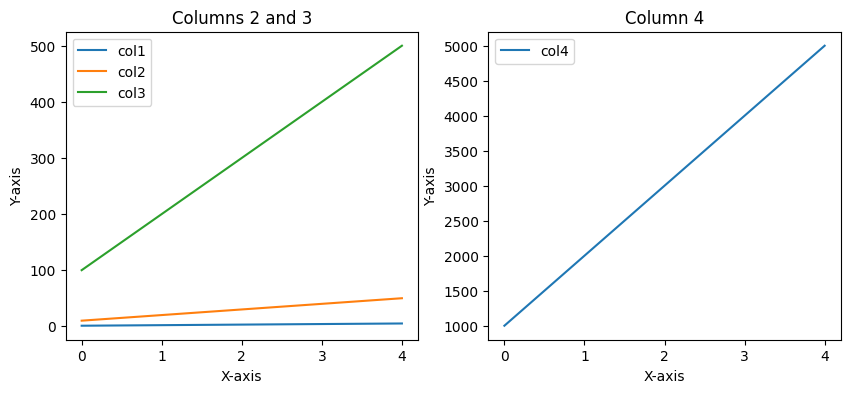

,col1,col2,col3,col4
0,1,10,100,1000
1,2,20,200,2000
2,3,30,300,3000
3,4,40,400,4000
4,5,50,500,5000


In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample dataframe
data = {'col1': [1, 2, 3, 4, 5],
        'col2': [10, 20, 30, 40, 50],
        'col3': [100, 200, 300, 400, 500],
        'col4': [1000, 2000, 3000, 4000, 5000]}
df = pd.DataFrame(data)

# create the first plot with 3 columns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
df.plot(y=['col1', 'col2', 'col3'], ax=ax1)

# create the second plot with the 4th column
df.plot(y='col4', ax=ax2)

# set titles for the plots
ax1.set_title('Columns 2 and 3')
ax2.set_title('Column 4')

# set labels for the x-axis and y-axis
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')

plt.show()

df